# **Removing more stopwords,running SVM, KNN, Random Forest, Logistic Regression, Naive Bayes classifiers on the Wingate Hotel data and generating word cloud for each classifier**

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  
import re  
import nltk  
from sklearn.datasets import load_files  
nltk.download('stopwords')  
import pickle  
from nltk.corpus import stopwords  
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer  
from sklearn.cross_validation import train_test_split  
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from collections import Counter
from operator import itemgetter

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gunjan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [44]:
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()

In [45]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS

In [46]:
df_score = pd.DataFrame(columns=['Classifier','Accuracy'])

## **Importing dataset and creating y variable**

In [47]:
df=pd.read_csv("DoubleTree Middle1.csv",encoding="utf8")
df.shape

(1255, 4)

In [48]:
df1 = df[df.review_rating != 3]
df1.loc[df["review_rating"]>=4,"y"]=1
df1.loc[df["review_rating"]<=2,"y"]=0

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [49]:
df_review = df1['review_body'].tolist()
target=df1['y'].tolist()
print(len(df_review))
df_review[9:12]

1018


['5 star hotel but at a fair price. The location is at the heart of Buckhead and convenient to Lennox mall and plenty of restaurants. There is no place I would stay after my experience at Double Tree. Also, those cookies are awesome so throw all diets out the window during your visit...this is a warning.',
 "Staff was rude and very unaccommodating. Wasn't able to check into our reserved rooms and my employees were stranded in the hotel lobby for two hours while I tried to communicate with anybody to help get them checked in. Couldn't reach a manager and was transferred from staff member to staff member. Had to call Hilton directly to get checked into our rooms that were already reserved with a credit card on file. ",
 "This hotel is in a fantastic location. You can walk to Malls, restaurants and MARTA! I also think the staff is above expectations!!! This is a great place to stay if you don't want to spend a lot on your room!"]

## Preprocessing

In [50]:
documents = []

for sen in range(0, len(df_review)):  
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(df_review[sen]))

    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

    # Remove single characters from the start
    #document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 

    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)

    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    #removing false flags falseFlags=["atlanta","hotel","restuarant",'check','employees']
    #document = re.sub(r'\s+atlanta|hotel|restuarant|check|staff|breakfast|dinner|lunch|told|shower|room|door|called|thank|drive|came|took','',document)

    # Converting to Lowercase
    document = document.lower()

    # Lemmatization
    #document = document.split()

    #document = [stemmer.lemmatize(word) for word in document]
    #document = ' '.join(document)

    documents.append(document)

In [51]:
print(documents[0:1])

['hotel was under crazy construction should not even have been open we made the reservation months ago and the hotel never informed us about it not by email not by phone nothing instead they lured us in to get our money by only breaking the news upon arrival only no gm support we were assured call back they never did and when asked at check in whether we be comped eric smuggly smiled and said no jackhammer level noise started at 9am and went all the way to 5 00pm during thanksgiving weekend and even started at 7 00am on sunday morning they again shurgged and could care lesa these people do not care the noise was maddening had to take shower with earplugs in then they managed to mess up the bill royally by charging other people rooms to our card run far away this hotel doesn care about you your stay or how it goes they want your money to fill rooms other guests in the complaint line had unwashed sheets and one even had blood on her sheets our room shower drain was clogged upon arrival t

## Using Spacy to find frequency of words. Run this only once on the whole document to add words to the stopwords file

In [52]:
str1 = ''.join(documents)
parsed_text = nlp(str1)

In [53]:
histogram = Counter()
for token in parsed_text:
    original_token_text = token.orth_  # `token` itself is not a string
    histogram[original_token_text] += 1

sorted_token_count_pairs = sorted(histogram.items(),
                                  reverse=True,
                                  key=itemgetter(1))
for token, count in sorted_token_count_pairs:
    print(token, ":", count)

the : 6190
and : 3710
to : 2860
was : 2623
in : 1664
hotel : 1283
of : 1271
for : 1236
is : 1192
room : 1018
it : 1016
we : 937
this : 924
at : 872
my : 859
very : 853
that : 835
were : 734
on : 734
not : 707
staff : 694
with : 659
had : 636
stay : 630
they : 621
but : 614
you : 584
have : 539
great : 520
there : 484
are : 414
our : 405
from : 405
as : 397
nice : 393
be : 389
me : 385
so : 377
would : 377
service : 375
good : 366
clean : 358
rooms : 350
location : 349
no : 333
all : 327
when : 320
one : 307
desk : 302
buckhead : 301
parking : 296
out : 294
front : 284
if : 263
up : 262
friendly : 262
here : 260
an : 259
breakfast : 248
only : 242
area : 238
again : 237
will : 236
night : 235
atlanta : 235
or : 226
check : 225
doubletree : 223
well : 219
get : 217
by : 213
time : 213
which : 212
valet : 211
about : 209
did : 204
stayed : 200
day : 198
comfortable : 197
restaurants : 196
i : 195
just : 188
like : 181
could : 178
us : 177
can : 171
back : 170
helpful : 164
hilton : 164
sh

woman : 11
okay : 11
mini : 11
superb : 11
saying : 11
comfort : 11
min : 11
address : 11
vouchers : 11
marriott : 11
shampoo : 11
centrally : 11
attended : 11
tip : 11
game : 11
dust : 11
ridiculous : 11
handled : 11
temperature : 11
calls : 11
hyatt : 11
club : 11
email : 10
gm : 10
drain : 10
concerns : 10
renovation : 10
inconvenience : 10
inside : 10
helping : 10
entrance : 10
weeks : 10
cheaper : 10
welcomed : 10
whole : 10
longer : 10
missing : 10
son : 10
attending : 10
often : 10
fault : 10
willing : 10
exceptional : 10
variety : 10
treat : 10
add : 10
honor : 10
95 : 10
furnishings : 10
higher : 10
jeffrey : 10
properly : 10
maid : 10
attractions : 10
giving : 10
expecting : 10
forgot : 10
traveler : 10
total : 10
remember : 10
barely : 10
courtesy : 10
corporate : 10
chair : 10
hotwire : 10
system : 10
interested : 10
fi : 10
housekeeper : 10
weren : 10
totally : 10
seriously : 10
elsewhere : 10
pleasure : 10
terrific : 10
trash : 10
questions : 10
bath : 10
informed : 9
pre

unfortunate : 4
associated : 4
section : 4
smoothly : 4
ensured : 4
mildew : 4
tech : 4
art : 4
eateries : 4
suggestion : 4
updates : 4
begin : 4
roomy : 4
kidding : 4
hanging : 4
sadly : 4
verified : 4
cramped : 4
excessive : 4
steps : 4
app : 4
cards : 4
conversation : 4
vs : 4
complaining : 4
nasty : 4
lied : 4
voicemail : 4
boss : 4
ear : 4
wished : 4
venue : 4
men : 4
costly : 4
departure : 4
tuesday : 4
incorrect : 4
affect : 4
unacceptable : 4
girls : 4
motel : 4
overbooked : 4
hassle : 4
breakfasts : 4
units : 4
original : 4
starbucks : 4
mins : 4
caused : 4
agent : 4
chastain : 4
photos : 4
cash : 4
broke : 4
select : 4
pushed : 4
solution : 4
consistently : 4
accommodated : 4
smoked : 4
knocked : 4
passed : 4
desired : 4
ms : 4
important : 4
groups : 4
explain : 4
types : 4
suitable : 4
filthy : 4
lock : 4
emergency : 4
share : 4
assume : 4
pair : 4
adjoining : 4
90 : 4
telling : 4
base : 4
reviewers : 4
greeting : 4
shows : 4
tables : 4
frequent : 4
previously : 4
profession

curtis : 2
performed : 2
décor : 2
wakeup : 2
disturbed : 2
gap : 2
timeline : 2
handing : 2
worry : 2
airy : 2
passing : 2
keying : 2
sleepers : 2
minimum : 2
handicap : 2
driven : 2
criminal : 2
amongst : 2
array : 2
surprisingly : 2
tells : 2
explanation : 2
apologies : 2
ants : 2
excess : 2
replacing : 2
depart : 2
stressful : 2
recommending : 2
brief : 2
screw : 2
solo : 2
conviently : 2
die : 2
ins : 2
sonya : 2
privacy : 2
lodging : 2
description : 2
male : 2
shining : 2
waffles : 2
grilled : 2
amc : 2
unaware : 2
jenee : 2
workout : 2
vale : 2
disappoint : 2
obnoxious : 2
heater : 2
blowing : 2
blame : 2
sympathetic : 2
selling : 2
decaf : 2
tolerable : 2
guarantee : 2
contacting : 2
spirit : 2
height : 2
pants : 2
cleared : 2
taller : 2
duck : 2
picking : 2
fails : 2
prints : 2
headboard : 2
til : 2
candy : 2
upgrades : 2
military : 2
charm : 2
superior : 2
deserves : 2
dollar : 2
cross : 2
instantly : 2
laughed : 2
waiters : 2
kicked : 2
indicate : 2
blow : 2
meh : 2
thoughtf

cereal : 1
drawbacks : 1
doorknob : 1
527 : 1
nit : 1
139 : 1
boys : 1
hosting : 1
stages : 1
routinely : 1
cluelesssuckered : 1
parkingordered : 1
basket : 1
smileno : 1
accurately : 1
format : 1
differnt : 1
saggy : 1
accomplished : 1
uses : 1
squashed : 1
zones : 1
improve : 1
iut : 1
ain : 1
joined : 1
varietal : 1
horrific : 1
expedited : 1
arranging : 1
dropping : 1
rm : 1
419 : 1
wager : 1
stroll : 1
peaceful : 1
fiancé : 1
whereabouts : 1
32nd : 1
attendance : 1
schedule : 1
scheduled : 1
decade : 1
dusty : 1
vacant : 1
baseboard : 1
finish : 1
peeled : 1
270 : 1
deter : 1
heating : 1
snowy : 1
avaiable : 1
ridiculously : 1
disrepair : 1
perfum : 1
tremendous : 1
desperate : 1
western : 1
mashup : 1
manageable : 1
flew : 1
grad : 1
nikko : 1
biscuit : 1
sunflower : 1
unimpressive : 1
hgi : 1
es : 1
sole : 1
president : 1
appliances : 1
lick : 1
traditional : 1
indoor : 1
outdoor : 1
tow : 1
addressing : 1
frame : 1
hubby : 1
tummy : 1
ache : 1
toilets : 1
restroom : 1
179 : 1
u

wing : 1
groupmy : 1
obscure : 1
newspapers : 1
180 : 1
turnaround : 1
b : 1
posting : 1
km : 1
carvery : 1
hub : 1
graciousness : 1
mission : 1
wore : 1
60ish : 1
seattle : 1
june : 1
430 : 1
wee : 1
815am : 1
rushing : 1
haste : 1
chargers : 1
headsets : 1
desktop : 1
167 : 1
217 : 1
router : 1
sick : 1
221 : 1
sights : 1
dewayne : 1
velvet : 1
malt : 1
scotch : 1
glenlivet : 1
glenlivets : 1
carried : 1
whistle : 1
tab : 1
hideous : 1
chalking : 1
smokers : 1
canopy : 1
ft : 1
sightseeing : 1
submit : 1
stupid : 1
characters : 1
advosor : 1
againmy : 1
drives : 1
friendliest : 1
intermittent : 1
usa : 1
cofee : 1
trees : 1
credible : 1
backside : 1
e : 1
towers : 1
510am : 1
minuets : 1
loadly : 1
ofetn : 1
rang : 1
510 : 1
650 : 1
investigate : 1
nail : 1
salon : 1
ex : 1
sidecar : 1
uncommon : 1
bartenders : 1
tweek : 1
valid : 1
orders : 1
sample : 1
buckhhead : 1
undergo : 1
overhaul : 1
interactions : 1
pickup : 1
saturdays : 1
elementary : 1
schoolchild : 1
dawn : 1
materializ

appreciates : 1
sleepy : 1
penalize : 1
interact : 1
bery : 1
helpfil : 1
cartels : 1
travellers : 1
hitlon : 1
comparing : 1
tube : 1
9999 : 1
edible : 1
eaten : 1
raucous : 1
laughter : 1
whistling : 1
discussing : 1
interacted : 1
distraction : 1
amy : 1
bucks : 1
ither : 1
gies : 1
convienent : 1
necessities : 1
brave : 1
hdtvs : 1
adults : 1
experiencing : 1
animal : 1
calm : 1
definently : 1
wofgang : 1
puck : 1
slippers : 1
mmmm : 1
hastened : 1
indulgently : 1
enroll : 1
enrolled : 1
adds : 1
joint : 1
fussed : 1
ratings : 1
potential : 1
walker : 1
lent : 1
byob : 1
cheating : 1
freely : 1
eve : 1
unlocked : 1
occupied : 1
electricity : 1
remarkable : 1
empowered : 1
fancy : 1
overseas : 1
grill : 1
renewal : 1
atlantastayed : 1
areai : 1
12th : 1
29 : 1
consecutively : 1
opting : 1
beware : 1
houseperson : 1
houseman : 1
bathe : 1
toast : 1
styrofoam : 1
taping : 1
collected : 1
huh : 1
edge : 1
dignity : 1
newer : 1
recessed : 1
function : 1
tune : 1
cough : 1
hack : 1
fro :

## Adding custom stopwords to be removed at the time of tfidf vectorization, after checking frequency of words from above code

In [54]:
StopWordsList = set(stopwords.words("english"))
#add custom words
StopWordsList.update(('wyndham','doubletree','service','pool','atlanta','location','stay','stayed','hotel','restaurant','restaurants',
                      'check','staff','breakfast','dinner','lunch','told','shower','room','door','called','thank','drive','came',
                      'took','night','hotels','go','buckhead', 'one','area','shuttle','shopping','another','said','hilton','manager','left'))


## Tfidf conversion

In [55]:
tfidfconverter = TfidfVectorizer(max_features=500, min_df=3, max_df=0.8, stop_words=StopWordsList,token_pattern=r'\b[^\d\W]+\b')  
X = tfidfconverter.fit_transform(documents).toarray()  

In [56]:
print(tfidfconverter.get_feature_names())
X.shape

['able', 'access', 'accommodating', 'accommodations', 'across', 'actually', 'additional', 'air', 'airport', 'almost', 'along', 'already', 'also', 'although', 'always', 'amazing', 'amenities', 'anyone', 'anything', 'anywhere', 'appointed', 'areas', 'around', 'arrival', 'arrived', 'ask', 'asked', 'attentive', 'attitude', 'available', 'average', 'away', 'awesome', 'back', 'bad', 'bags', 'bar', 'bartender', 'bathroom', 'bed', 'beds', 'behind', 'best', 'better', 'beyond', 'big', 'bill', 'bit', 'block', 'blocks', 'book', 'booked', 'bring', 'brought', 'buffet', 'building', 'business', 'call', 'car', 'card', 'care', 'carpet', 'center', 'change', 'charge', 'charged', 'charges', 'checked', 'checking', 'checkout', 'chip', 'chocolate', 'choice', 'choose', 'city', 'clean', 'cleaned', 'cleaning', 'close', 'closed', 'coffee', 'cold', 'come', 'comfortable', 'comfy', 'coming', 'complaint', 'complimentary', 'conference', 'construction', 'convenient', 'cookie', 'cookies', 'corner', 'cost', 'could', 'coup

(1018, 500)

## Splitting dataset into train, validation and test

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=1,stratify=target)  
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1,stratify=y_train)  

In [58]:
print(Counter(target),"\n")
print(Counter(y_train),"\n")
print(Counter(y_train1),"\n")
print(Counter(y_test),"\n")
print(Counter(y_val),"\n")

Counter({1.0: 761, 0.0: 257}) 

Counter({1.0: 609, 0.0: 205}) 

Counter({1.0: 487, 0.0: 164}) 

Counter({1.0: 152, 0.0: 52}) 

Counter({1.0: 122, 0.0: 41}) 



## Logistic regression. Choosing Final model using Validation and using it to predict on Test dataset. Generating Confusion Matrix also

In [59]:
for c in [0.01, 0.05, 0.25, 0.5, 0.75, 1]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train1,y_train1)
    y_pred = lr.predict(X_val)  
    print ("Accuracy for C = %s: %s" % (c, accuracy_score(y_val, lr.predict(X_val))))

Accuracy for C = 0.01: 0.7484662576687117
Accuracy for C = 0.05: 0.7484662576687117
Accuracy for C = 0.25: 0.754601226993865
Accuracy for C = 0.5: 0.8220858895705522
Accuracy for C = 0.75: 0.8773006134969326
Accuracy for C = 1: 0.8834355828220859


In [60]:
final_model = LogisticRegression(C=0.75)
final_model.fit(X_train,y_train)
y_pred_1 = final_model.predict(X_test)  
print ("Final Accuracy : %s" % accuracy_score(y_test,final_model.predict(X_test)))
print(confusion_matrix(y_test,y_pred_1))  
print(classification_report(y_test,y_pred_1))  
print(accuracy_score(y_test, y_pred_1))

df_score.loc[0] = ['Logistic Regression',accuracy_score(y_test, y_pred_1)]

Final Accuracy : 0.8578431372549019
[[ 25  27]
 [  2 150]]
             precision    recall  f1-score   support

        0.0       0.93      0.48      0.63        52
        1.0       0.85      0.99      0.91       152

avg / total       0.87      0.86      0.84       204

0.8578431372549019


In [61]:
print(Counter(y_pred_1),"\n")
print(df_score)

Counter({1.0: 177, 0.0: 27}) 

            Classifier  Accuracy
0  Logistic Regression  0.857843


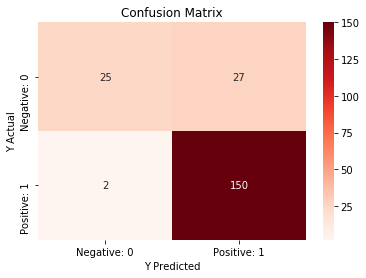

In [62]:
# labels=['Negative: 0','Positive: 1']
cm = confusion_matrix(y_test, y_pred_1)
ax= plt.subplot()
sns.heatmap(cm, cmap= 'Reds',annot=True, ax = ax,fmt='g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Y Predicted');ax.set_ylabel('Y Actual'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Negative: 0','Positive: 1']); ax.yaxis.set_ticklabels(['Negative: 0','Positive: 1']);

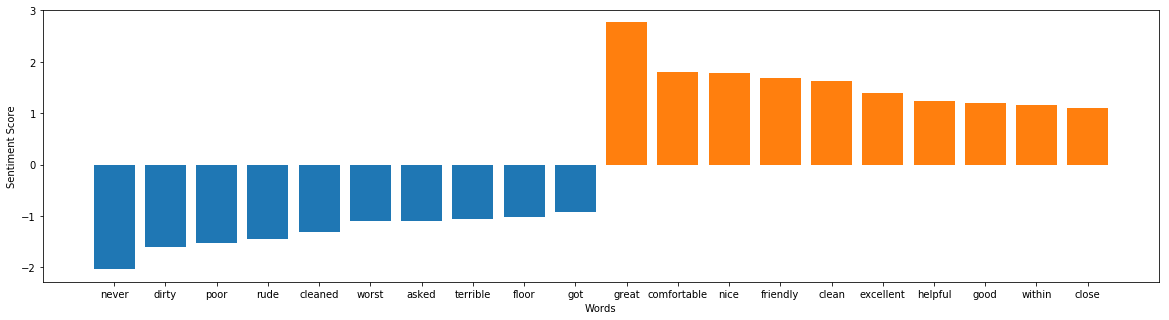

In [65]:
pos_list = sorted(feature_to_coef.items(),key=lambda x:x[1], reverse=True)[:10] # sorted by key, return a list of tuples
neg_list = sorted(feature_to_coef.items(),key=lambda x:x[1])[:10]
x1,x2 = zip(*pos_list) # unpack a list of pairs into two tuples
x3,x4=zip(*neg_list)
plt.figure(figsize=(20, 5))
plt.bar(x3,x4)
plt.bar(x1, x2)
plt.xlabel("Words")
plt.ylabel("Sentiment Score")
plt.show()

## Sanity Check: Get best positive and best negative words

In [64]:
feature_to_coef = {
    word: coef for word, coef in zip(
    tfidfconverter.get_feature_names(),final_model.coef_[0])
}

for best_positive in sorted(feature_to_coef.items(),key=lambda x:x[1], reverse=True)[:10]:
    print(best_positive)

('great', 2.7662561687578515)
('comfortable', 1.8015545586876933)
('nice', 1.7830825508667838)
('friendly', 1.6826768351757497)
('clean', 1.6347548826023386)
('excellent', 1.3995496561847867)
('helpful', 1.2277705992469736)
('good', 1.1971278773294274)
('within', 1.1556131502760396)
('close', 1.0995745836274071)


In [66]:
feature_to_coef = {
    word: coef for word, coef in zip(
    tfidfconverter.get_feature_names(),final_model.coef_[0])
}
for best_negative in sorted(feature_to_coef.items(),key=lambda x:x[1])[:10]:
    print(best_negative)

('never', -2.041461627329987)
('dirty', -1.6057580197009844)
('poor', -1.517240632690002)
('rude', -1.4550967060876738)
('cleaned', -1.3157897624406583)
('worst', -1.0998181652903436)
('asked', -1.0912245795731779)
('terrible', -1.056991344563337)
('floor', -1.027841828456501)
('got', -0.9191531414806804)


## Generating Word Cloud for Most Negative Words,All Negative Words,Neutral Words,All Positive Words and Most Positive Words

In [67]:
words=list(feature_to_coef.keys())
neg_words_dict=dict((k, v) for k, v in feature_to_coef.items() if v <0)
neg_words=list(neg_words_dict.keys())
more_neg_words_dict=dict((k, v) for k, v in feature_to_coef.items() if v <-0.5)
more_neg_words=list(more_neg_words_dict.keys())
#neutral_words_dict=dict((k, v) for k, v in feature_to_coef.items() if v ==0)
#neutral_words=list(neutral_words_dict.keys())
pos_words_dict=dict((k, v) for k, v in feature_to_coef.items() if v >0)
pos_words=list(pos_words_dict.keys())
more_pos_words_dict=dict((k, v) for k, v in feature_to_coef.items() if v >0.5)
more_pos_words=list(more_pos_words_dict.keys())

In [68]:
print(more_pos_words_dict)

{'always': 0.8367492676905072, 'amazing': 0.6035108627655111, 'awesome': 0.7600746689592519, 'best': 0.5400044251376203, 'big': 0.5242793391710874, 'business': 0.5929840678785033, 'clean': 1.6347548826023386, 'close': 1.0995745836274071, 'comfortable': 1.8015545586876933, 'conference': 0.6153023233732637, 'cookies': 0.5307703153039466, 'courteous': 0.5595359563609786, 'definitely': 0.8665497067190513, 'dexter': 0.5971066985158854, 'dining': 0.5044504684264213, 'distance': 0.9403921599095858, 'easy': 0.611404008879566, 'enjoyed': 0.8511097005961517, 'everything': 0.692268160674535, 'excellent': 1.3995496561847867, 'feel': 0.5662434330531708, 'free': 0.5015417702274251, 'friendly': 1.6826768351757497, 'good': 1.1971278773294274, 'great': 2.7662561687578515, 'helpful': 1.2277705992469736, 'located': 0.8742615834626181, 'mall': 0.7434328586530283, 'marta': 0.9320751635084481, 'minute': 0.5290637132849186, 'nice': 1.7830825508667838, 'outstanding': 0.5265655695209537, 'perfect': 0.960078453

In [69]:
def wc(data,bgcolor):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

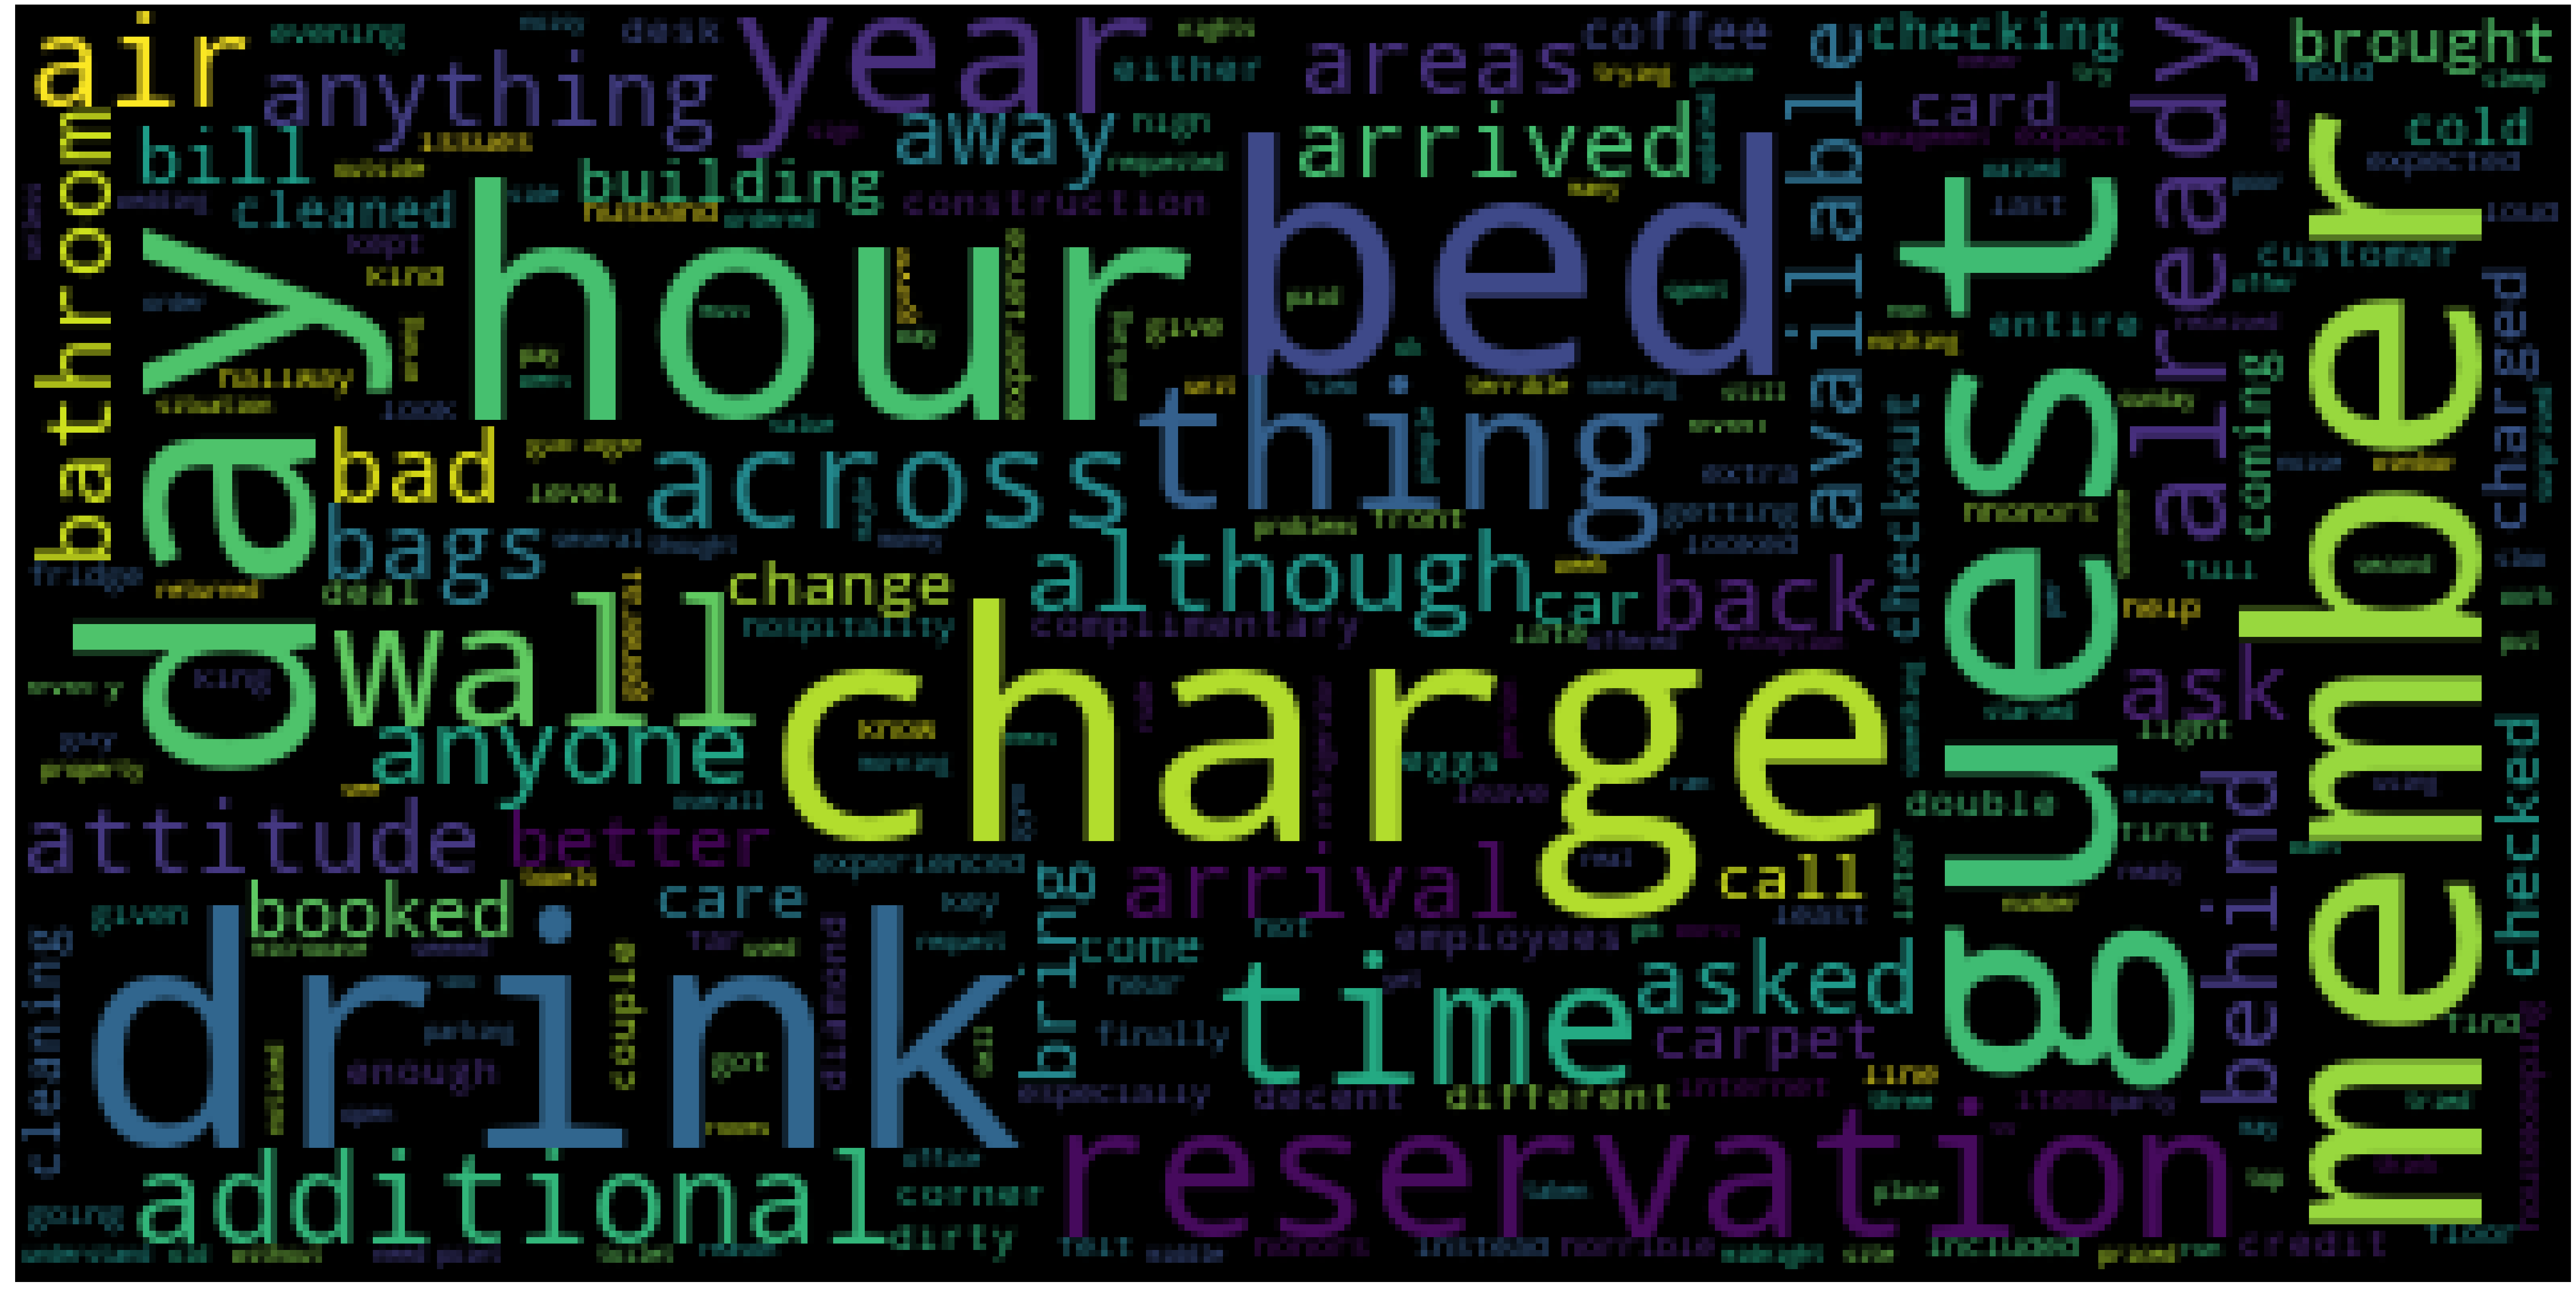

In [70]:
wc(neg_words,'black')

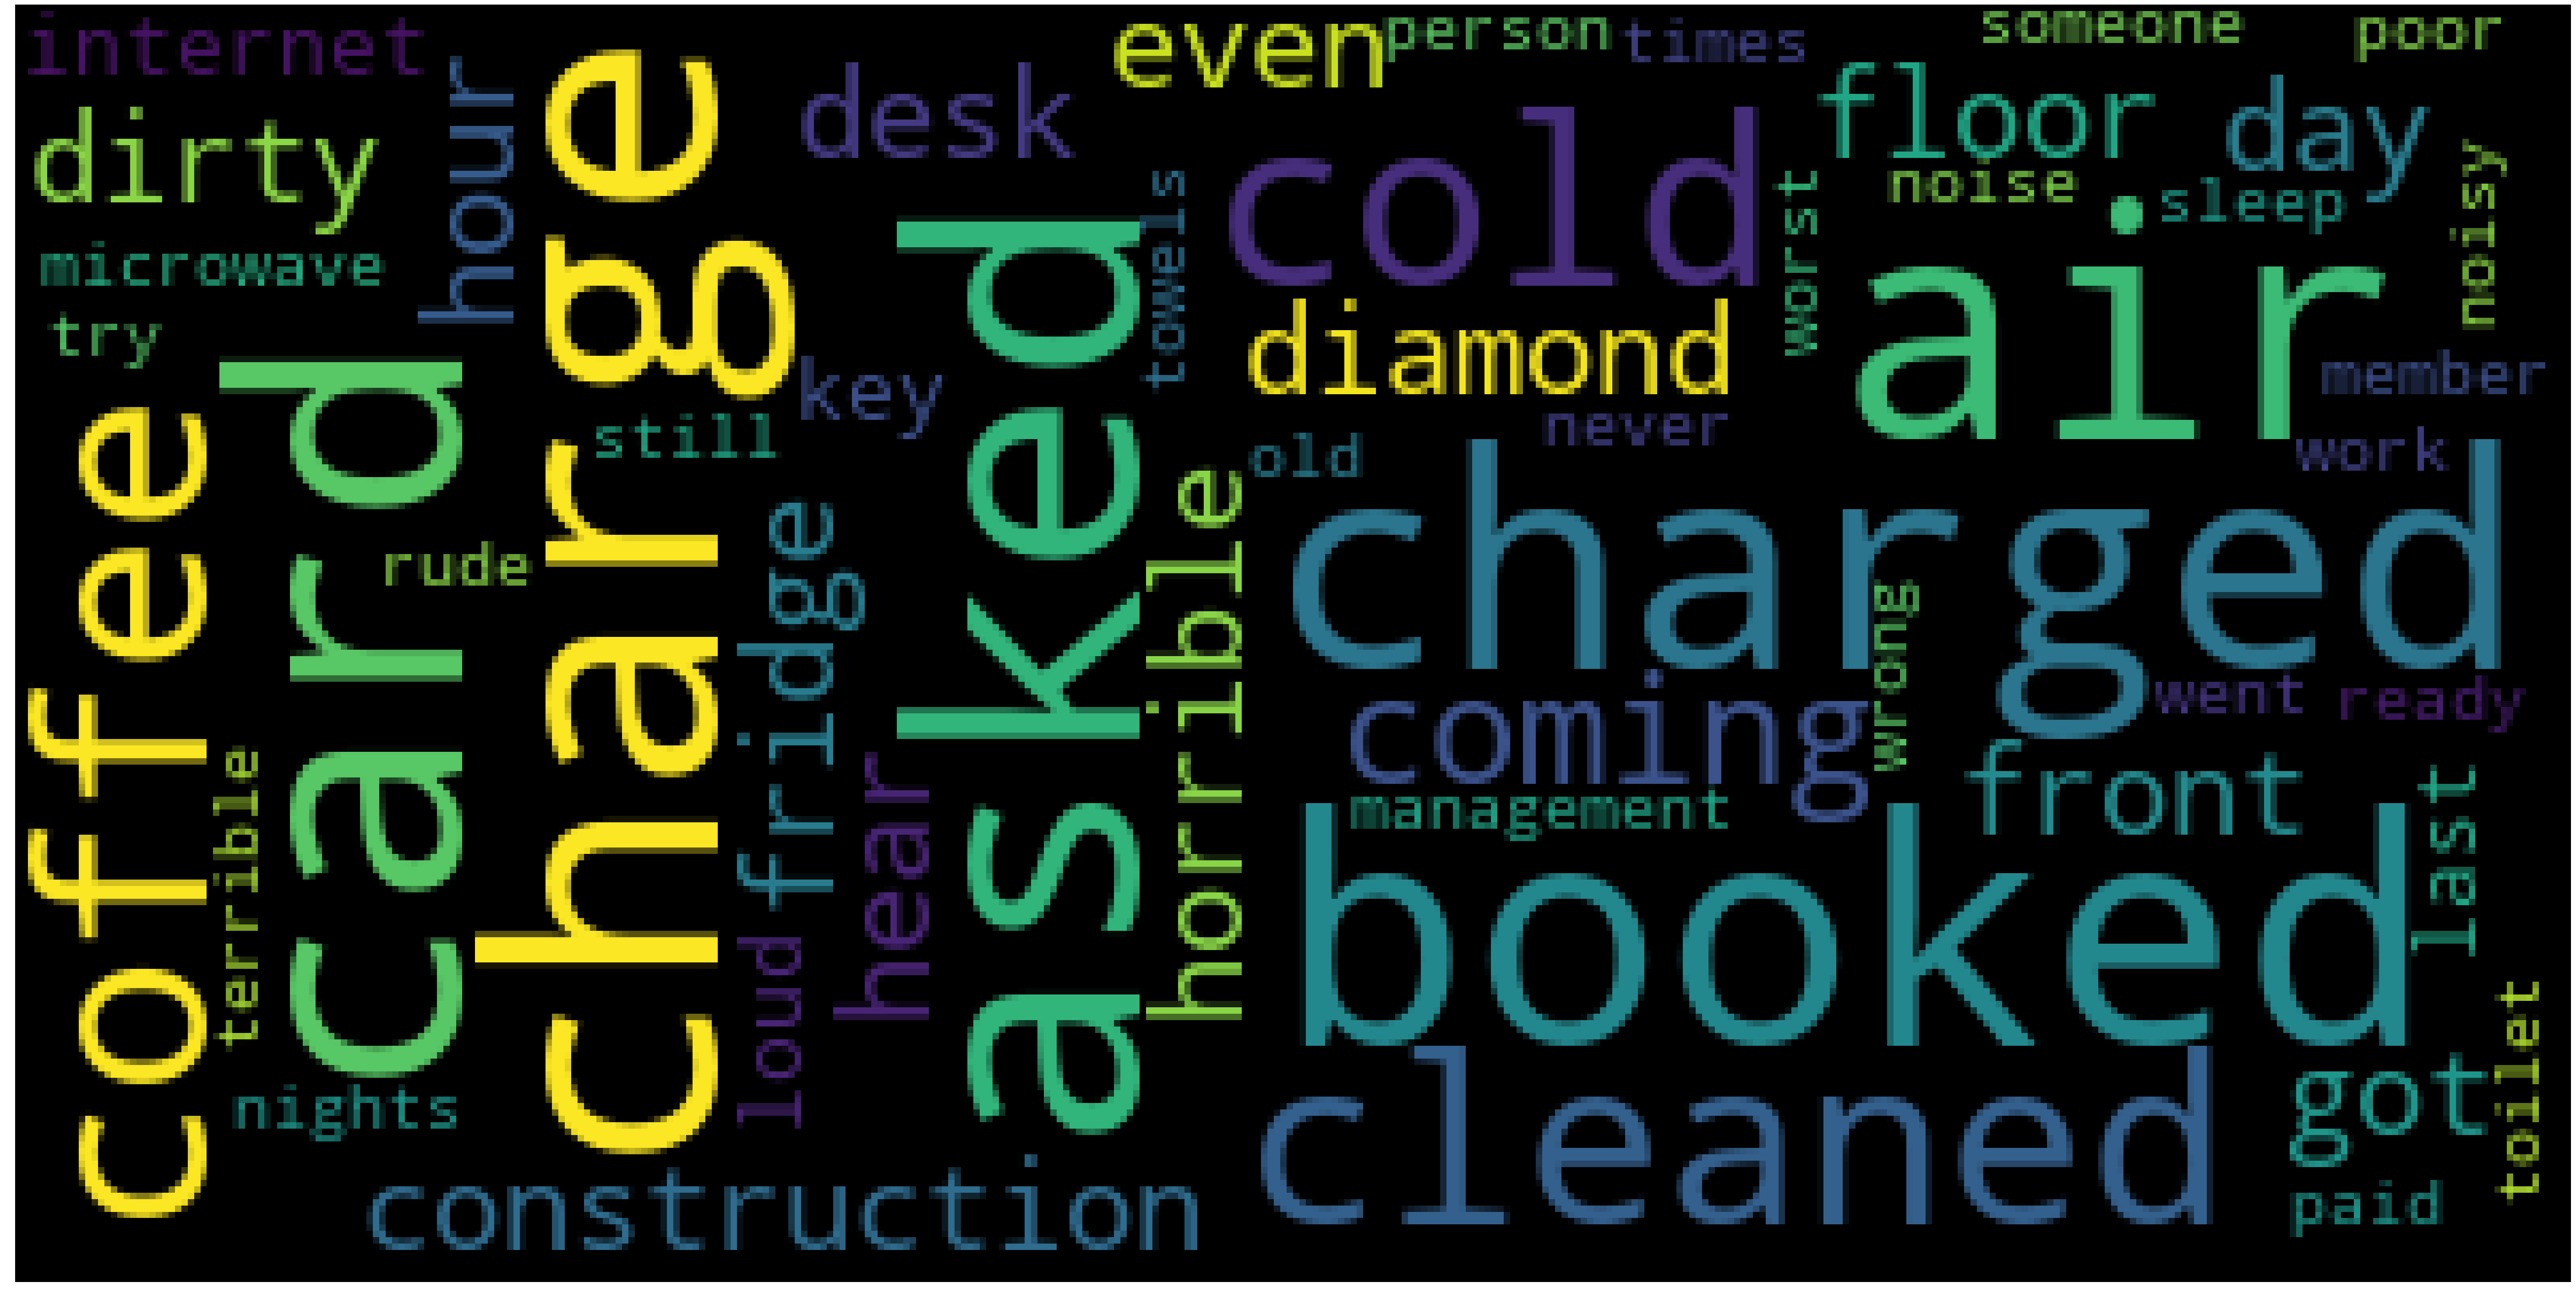

In [71]:
wc(more_neg_words,'black')

In [72]:
#wc(neutral_words,'black')

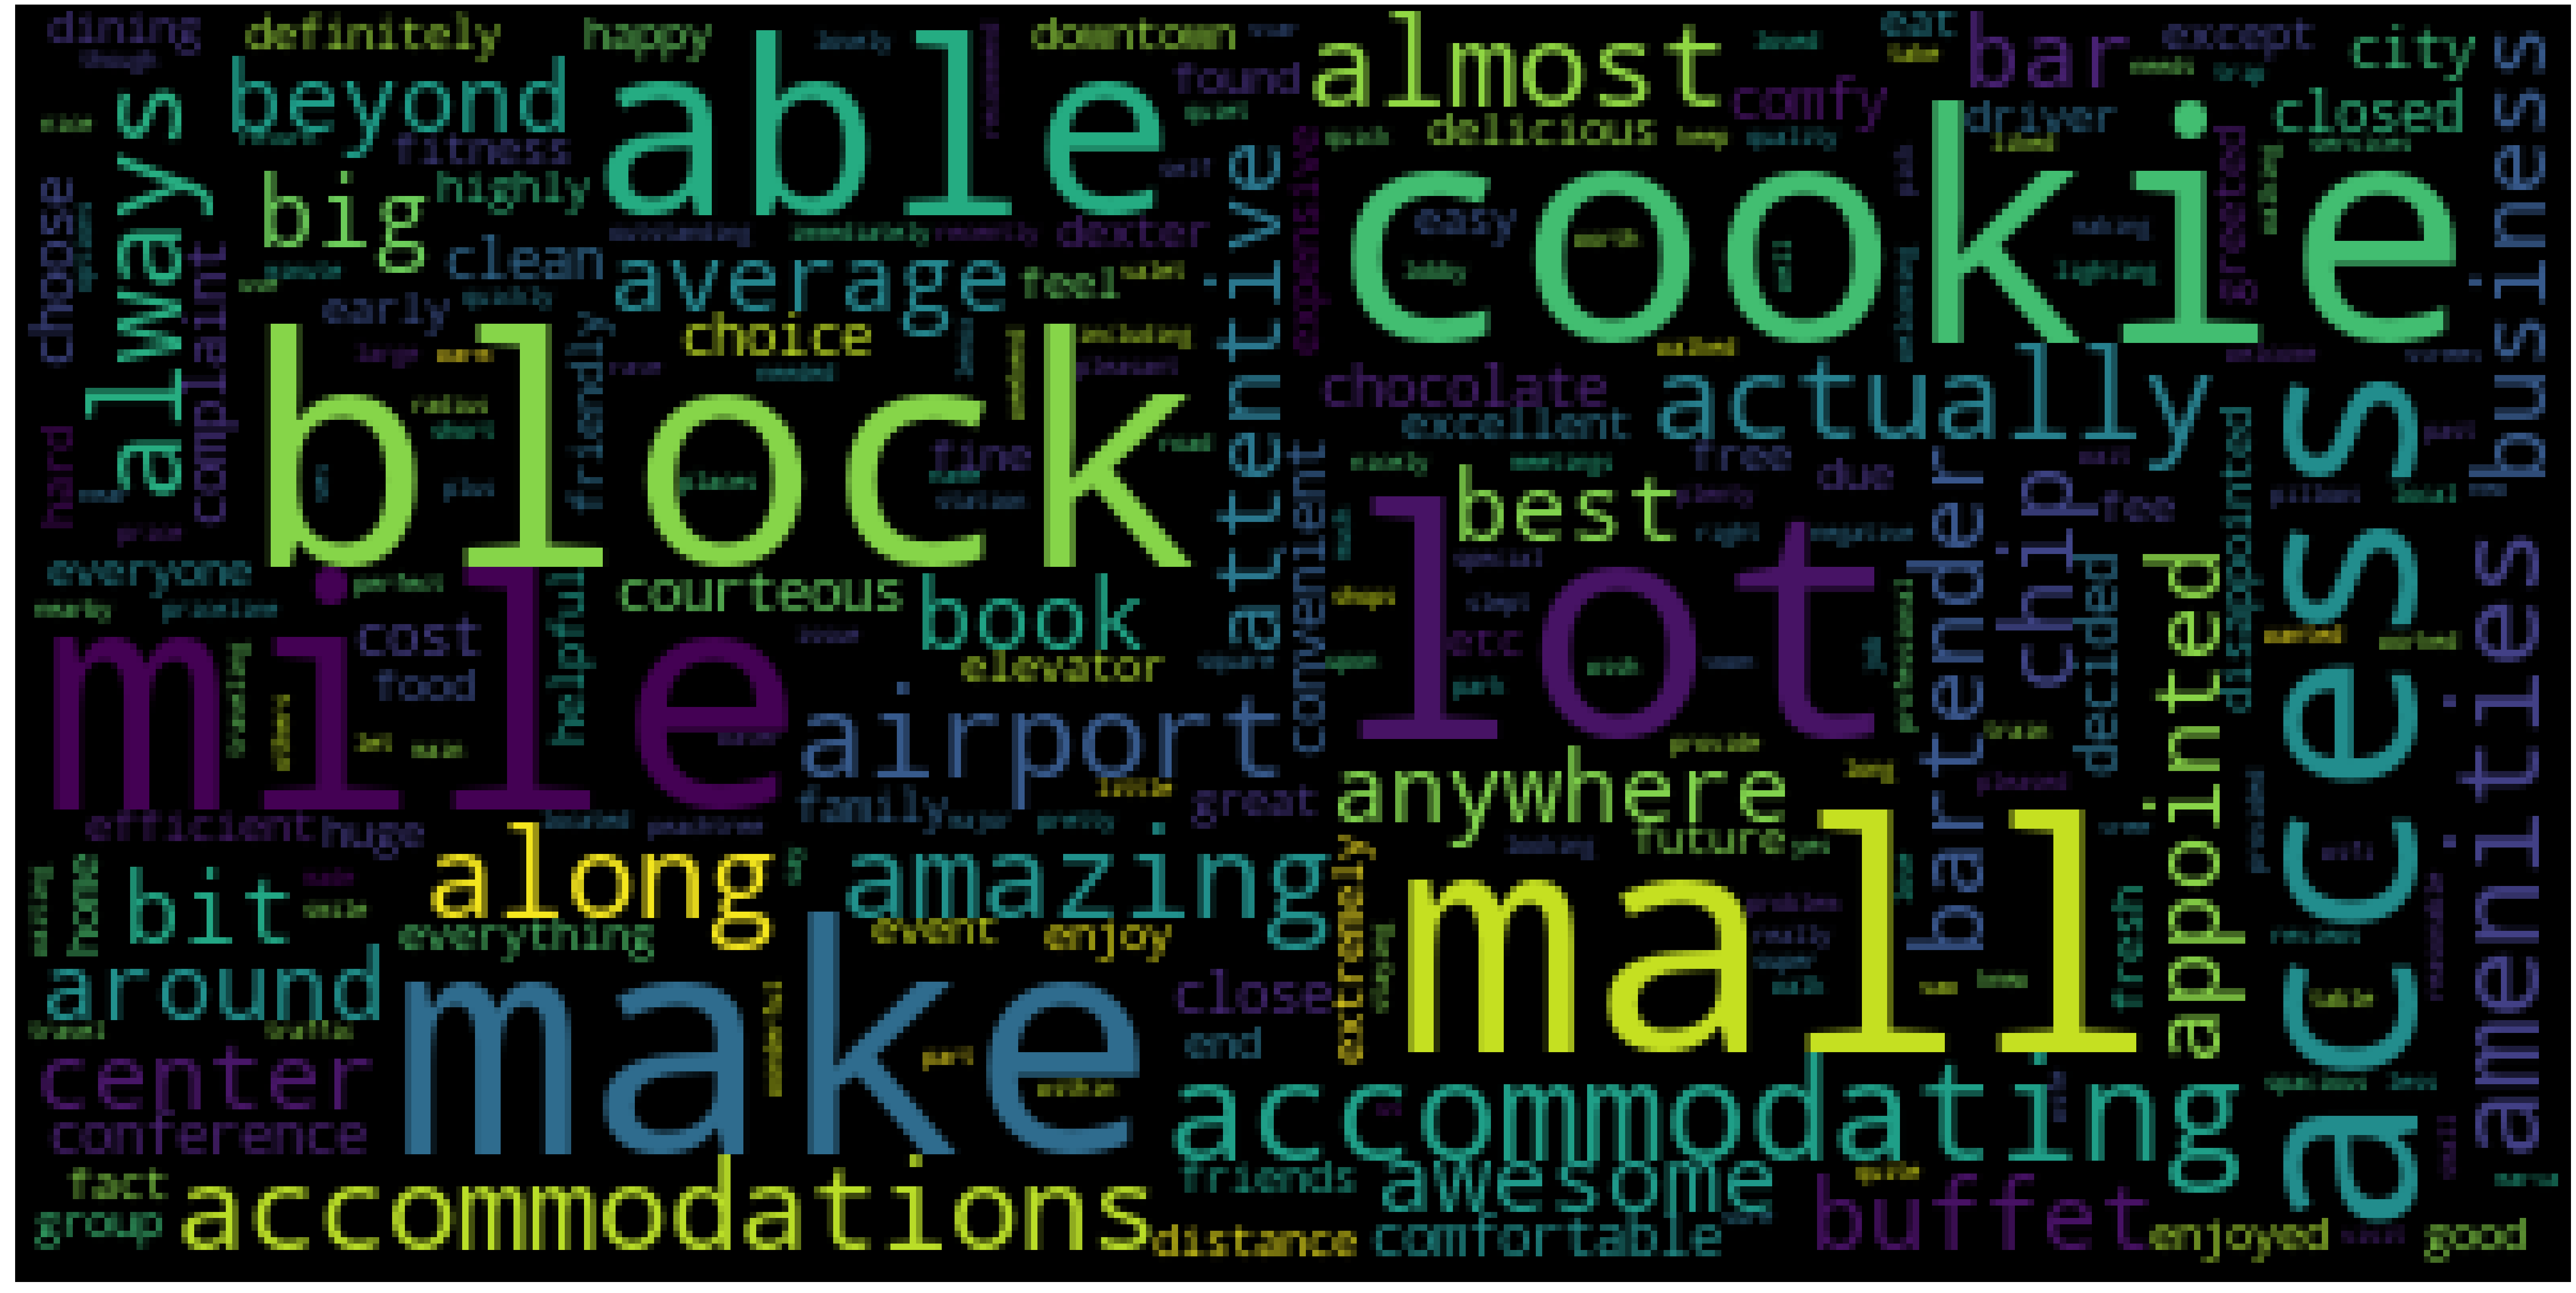

In [73]:
wc(pos_words,'black')

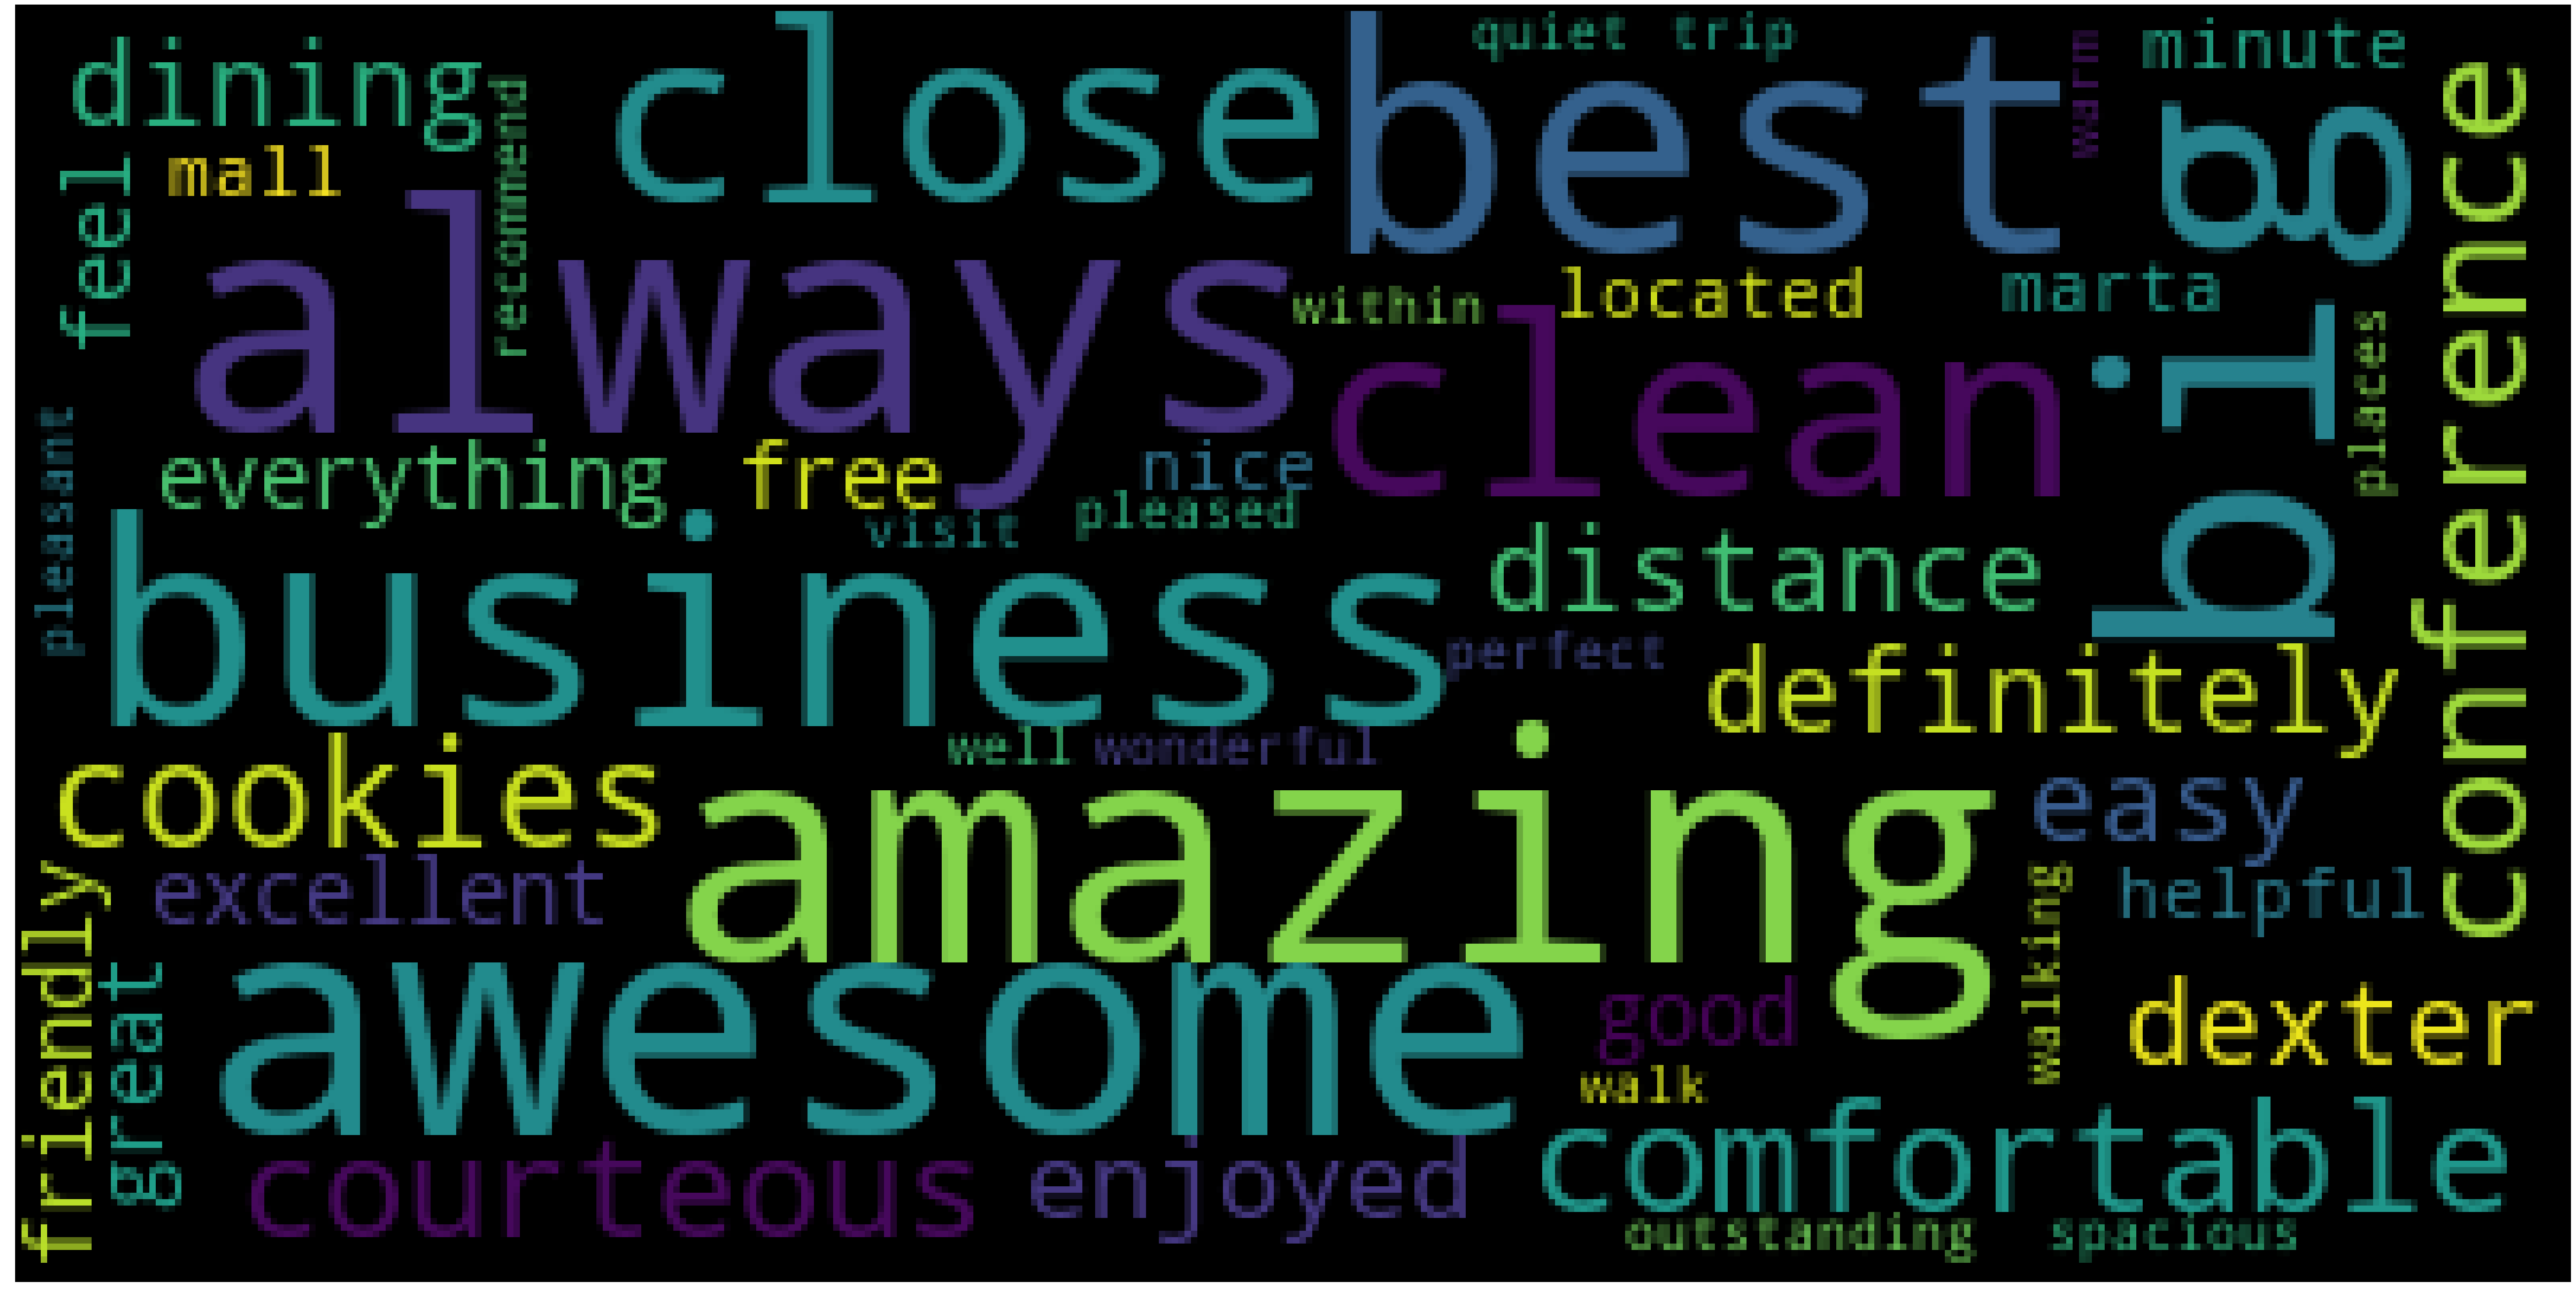

In [74]:
wc(more_pos_words,'black')

## Random Forest Classifier

In [ ]:
forest_res=pd.DataFrame(columns=['Count of Trees','Tree Depth','Train Score','Test Score'])
indexR=1
for count in range(100,501,100):
    for tree_depth in range (1,21):
        forest=RandomForestClassifier(criterion='entropy',n_estimators=count,max_depth=tree_depth,random_state=1,n_jobs=-1)
        forest.fit(X_train,y_train)
        train_score=forest.score(X_train1,y_train1)
        test_score=forest.score(X_val,y_val)
        forest_res.loc[indexR]=[count,tree_depth,train_score,test_score]    
        indexR =indexR+1
#printing optimal tree parameters
forest_res.loc[forest_res['Test Score'].idxmax()]

In [ ]:
final_model=RandomForestClassifier(criterion='entropy',n_estimators=21,max_depth=3,random_state=1,n_jobs=-1)
final_model=final_model.fit(X_train,y_train)
y_pred_1 = final_model.predict(X_test)  
print ("Final Accuracy : %s" % accuracy_score(y_test,final_model.predict(X_test)))
print(confusion_matrix(y_test,y_pred_1))  
print(classification_report(y_test,y_pred_1))  
print(accuracy_score(y_test, y_pred_1))

df_score.loc[1] = ['Random Forest',accuracy_score(y_test, y_pred_1)]

In [ ]:
print(Counter(y_pred_1),"\n")
print(df_score)

In [ ]:
# labels=['Negative: 0','Positive: 1']
cm = confusion_matrix(y_test, y_pred_1)
ax= plt.subplot()
sns.heatmap(cm, cmap= 'Reds',annot=True, ax = ax,fmt='g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Y Predicted');ax.set_ylabel('Y Actual'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Negative: 0','Positive: 1']); ax.yaxis.set_ticklabels(['Negative: 0','Positive: 1']);

## kNN Euclidean with weigths

In [ ]:
knn_res=pd.DataFrame(columns=['KNN','Train Score','Test Score'])
for k in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=k,p=2,metric='minkowski',weights='distance')
    knn.fit(X_train1,y_train1)
    train_score=knn.score(X_train1,y_train1)
    test_score=knn.score(X_val,y_val)
    knn_res.loc[k]=[k,train_score,test_score]
print(knn_res.head(21))

In [ ]:
final_model=KNeighborsClassifier(n_neighbors=10,p=2,metric='minkowski',weights='distance')
final_model=final_model.fit(X_train,y_train)
y_pred_1=final_model.predict(X_test)
print ("Final Accuracy : %s" % accuracy_score(y_test,final_model.predict(X_test)))
print(confusion_matrix(y_test,y_pred_1))  
print(classification_report(y_test,y_pred_1))  
print(accuracy_score(y_test, y_pred_1))
#Recall better than logistic

df_score.loc[2] = ['kNN Euclidean with Weights',accuracy_score(y_test, y_pred_1)]

In [ ]:
print(Counter(y_pred_1),"\n")
print(df_score)

In [ ]:
# labels=['Negative: 0','Positive: 1']
cm = confusion_matrix(y_test, y_pred_1)
ax= plt.subplot()
sns.heatmap(cm, cmap= 'Reds',annot=True, ax = ax,fmt='g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Y Predicted');ax.set_ylabel('Y Actual'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Negative: 0','Positive: 1']); ax.yaxis.set_ticklabels(['Negative: 0','Positive: 1']);

## kNN Manhattan with weigths

In [ ]:
knn_res=pd.DataFrame(columns=['KNN','Train Score','Test Score'])
for k in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=k,p=1,metric='minkowski',weights='distance')
    knn.fit(X_train1,y_train1)
    train_score=knn.score(X_train1,y_train1)
    test_score=knn.score(X_val,y_val)
    knn_res.loc[k]=[k,train_score,test_score]
print(knn_res.head(21))

In [ ]:
final_model=KNeighborsClassifier(n_neighbors=9,p=1,metric='minkowski',weights='distance')
final_model=final_model.fit(X_train,y_train)
y_pred_1=final_model.predict(X_test)
print ("Final Accuracy : %s" % accuracy_score(y_test,final_model.predict(X_test)))
print(confusion_matrix(y_test,y_pred_1))  
print(classification_report(y_test,y_pred_1))  
print(accuracy_score(y_test, y_pred_1))
df_score.loc[3] = ['kNN Manhattan with Weights',accuracy_score(y_test, y_pred_1)]
#Recall is very low

In [ ]:
print(Counter(y_pred_1),"\n")
print(df_score)

In [ ]:
# labels=['Negative: 0','Positive: 1']
cm = confusion_matrix(y_test, y_pred_1)
ax= plt.subplot()
sns.heatmap(cm, cmap= 'Reds',annot=True, ax = ax,fmt='g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Y Predicted');ax.set_ylabel('Y Actual'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Negative: 0','Positive: 1']); ax.yaxis.set_ticklabels(['Negative: 0','Positive: 1']);

## SVM Classifier

In [ ]:
for c in [0.01,0.05,0.1,0.15,0.2,0.5,1]:
    svm = SVC(C=c,kernel='linear')
    svm.fit(X_train1,y_train1)
    print ("Accuracy for C = %s: %s" % (c, accuracy_score(y_val, svm.predict(X_val))))

In [ ]:
clf = SVC(gamma='auto',C=0.5,kernel='linear')
clf.fit(X, target)
y_pred_1=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred_1))  
print(classification_report(y_test,y_pred_1))  
print(accuracy_score(y_test, y_pred_1))

df_score.loc[4] = ['SVC',accuracy_score(y_test, y_pred_1)]
#Giving very good classification

In [ ]:
# labels=['Negative: 0','Positive: 1']
cm = confusion_matrix(y_test, y_pred_1)
ax= plt.subplot()
sns.heatmap(cm, cmap= 'Reds',annot=True, ax = ax,fmt='g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Y Predicted');ax.set_ylabel('Y Actual'); 
ax.set_title('Confusion Matrix for Double Tree'); 
ax.xaxis.set_ticklabels(['Negative: 0','Positive: 1']); ax.yaxis.set_ticklabels(['Negative: 0','Positive: 1']);

## Naive Bayes Classifier

In [ ]:
clf_nb = GaussianNB() 
clf_nb.fit(X,target)
y_pred_1=clf_nb.predict(X_test)
print(confusion_matrix(y_test,y_pred_1))  
print(classification_report(y_test,y_pred_1))  
print(accuracy_score(y_test, y_pred_1))

df_score.loc[5] = ['Naive Bayes',accuracy_score(y_test, y_pred_1)]
#performing well but not as good as SVM

In [ ]:
print(df_score)

In [ ]:
#Bar Plot of Classifiers
import matplotlib.pyplot as plt
ax = df_score.plot.bar(x='Classifier', y='Accuracy', rot=90)

In [ ]:
ax = df_score.plot.line()

# Selecting the best classifier in this case

[[ 47   5]
 [  2 150]]
             precision    recall  f1-score   support

        0.0       0.96      0.90      0.93        52
        1.0       0.97      0.99      0.98       152

avg / total       0.97      0.97      0.97       204

0.9656862745098039
('great', 2.59446718602081)
('nice', 1.6937439025392058)
('comfortable', 1.6223055019563575)
('friendly', 1.4978409152825336)
('perfect', 1.3367684701441989)
('clean', 1.3114834491863723)
('good', 1.2718559286063045)
('helpful', 1.2475711899587512)
('excellent', 1.1489404721959526)
('enjoyed', 1.0951014964705712)


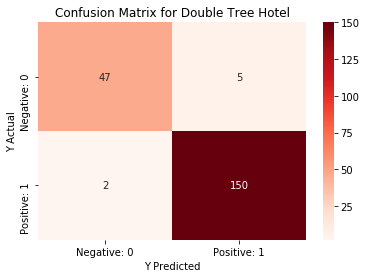

In [75]:
clf_SVC = SVC(gamma='auto',C=0.5,kernel='linear')
clf_SVC.fit(X, target)
y_pred_1=clf_SVC.predict(X_test)
print(confusion_matrix(y_test,y_pred_1))  
print(classification_report(y_test,y_pred_1))  
print(accuracy_score(y_test, y_pred_1))
#Giving very good classification


# labels=['Negative: 0','Positive: 1']
cm = confusion_matrix(y_test, y_pred_1)
ax= plt.subplot()
sns.heatmap(cm, cmap= 'Reds',annot=True, ax = ax,fmt='g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Y Predicted');ax.set_ylabel('Y Actual'); 
ax.set_title('Confusion Matrix for Double Tree Hotel'); 
ax.xaxis.set_ticklabels(['Negative: 0','Positive: 1']); ax.yaxis.set_ticklabels(['Negative: 0','Positive: 1']);


feature_to_coef = {
    word: coef for word, coef in zip(
    tfidfconverter.get_feature_names(),clf_SVC.coef_[0])
}

for best_positive in sorted(feature_to_coef.items(),key=lambda x:x[1], reverse=True)[:10]:
    print(best_positive)
    
    
    





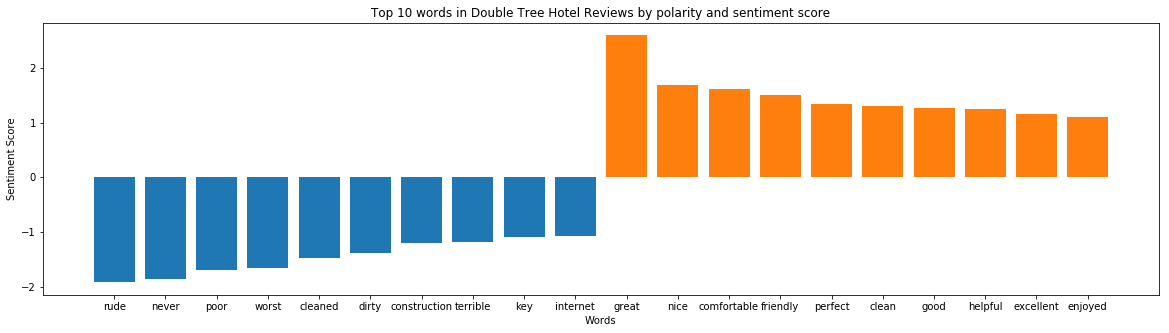

('rude', -1.9246176132718296)
('never', -1.8649017786994004)
('poor', -1.6954437873728494)
('worst', -1.6579147906914666)
('cleaned', -1.4684399403687731)
('dirty', -1.3826484563936807)
('construction', -1.212011472225154)
('terrible', -1.1789154643136583)
('key', -1.0900689205419818)
('internet', -1.0672783657195442)


In [76]:
#Top 10 words in Double Tree Hotel Reviews by polarity and sentiment score
pos_list = sorted(feature_to_coef.items(),key=lambda x:x[1], reverse=True)[:10] # sorted by key, return a list of tuples
neg_list = sorted(feature_to_coef.items(),key=lambda x:x[1])[:10]
x1,x2 = zip(*pos_list) # unpack a list of pairs into two tuples
x3,x4=zip(*neg_list)
plt.figure(figsize=(20, 5))
plt.bar(x3,x4)
plt.bar(x1, x2)
plt.xlabel("Words")
plt.ylabel("Sentiment Score")
plt.title("Top 10 words in Double Tree Hotel Reviews by polarity and sentiment score")
plt.show()

feature_to_coef = {
    word: coef for word, coef in zip(
    tfidfconverter.get_feature_names(),clf_SVC.coef_[0])
}
for best_negative in sorted(feature_to_coef.items(),key=lambda x:x[1])[:10]:
    print(best_negative)
    
    
words=list(feature_to_coef.keys())
neg_words_dict=dict((k, v) for k, v in feature_to_coef.items() if v <0)
neg_words=list(neg_words_dict.keys())
more_neg_words_dict=dict((k, v) for k, v in feature_to_coef.items() if v <-0.5)
more_neg_words=list(more_neg_words_dict.keys())
#neutral_words_dict=dict((k, v) for k, v in feature_to_coef.items() if v ==0)
#neutral_words=list(neutral_words_dict.keys())
pos_words_dict=dict((k, v) for k, v in feature_to_coef.items() if v >0)
pos_words=list(pos_words_dict.keys())
more_pos_words_dict=dict((k, v) for k, v in feature_to_coef.items() if v >0.5)
more_pos_words=list(more_pos_words_dict.keys())


In [77]:
words=list(feature_to_coef.keys())
neg_words_dict=dict((k, v) for k, v in feature_to_coef.items() if v <0)
neg_words=list(neg_words_dict.keys())
more_neg_words_dict=dict((k, v) for k, v in feature_to_coef.items() if v <-0.5)
more_neg_words=list(more_neg_words_dict.keys())
#neutral_words_dict=dict((k, v) for k, v in feature_to_coef.items() if v ==0)
#neutral_words=list(neutral_words_dict.keys())
pos_words_dict=dict((k, v) for k, v in feature_to_coef.items() if v >0)
pos_words=list(pos_words_dict.keys())
more_pos_words_dict=dict((k, v) for k, v in feature_to_coef.items() if v >0.5)
more_pos_words=list(more_pos_words_dict.keys())

In [78]:
def wc(data,bgcolor):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

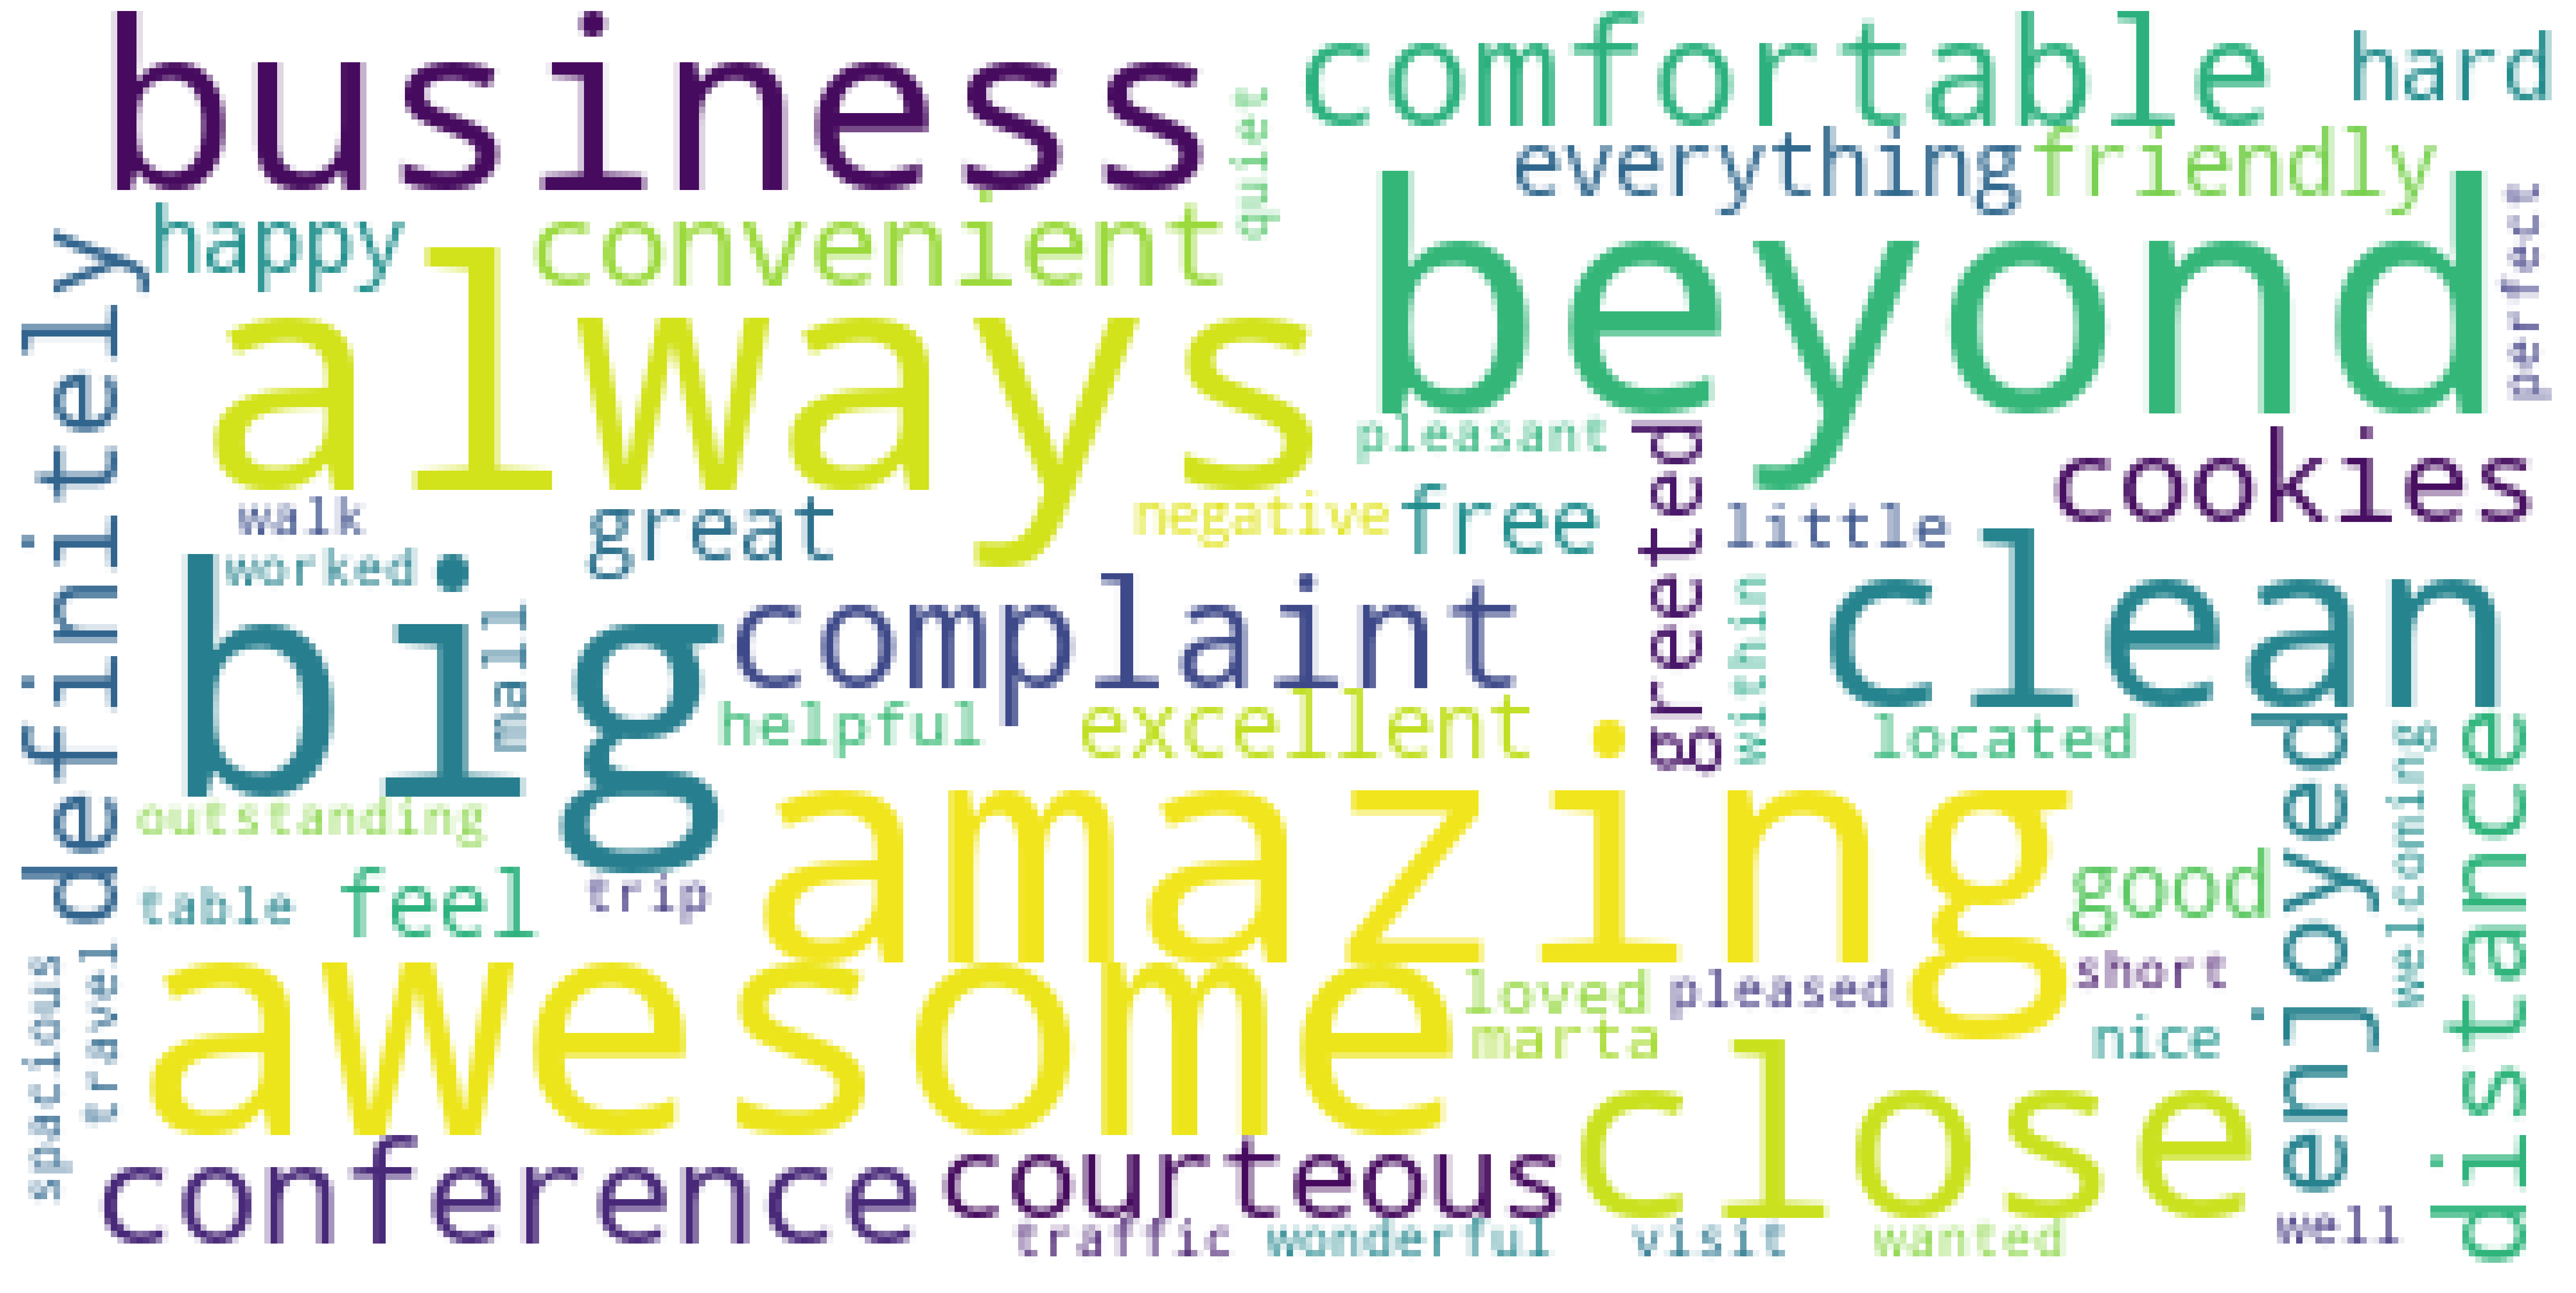

In [82]:
wc(more_pos_words,'white')

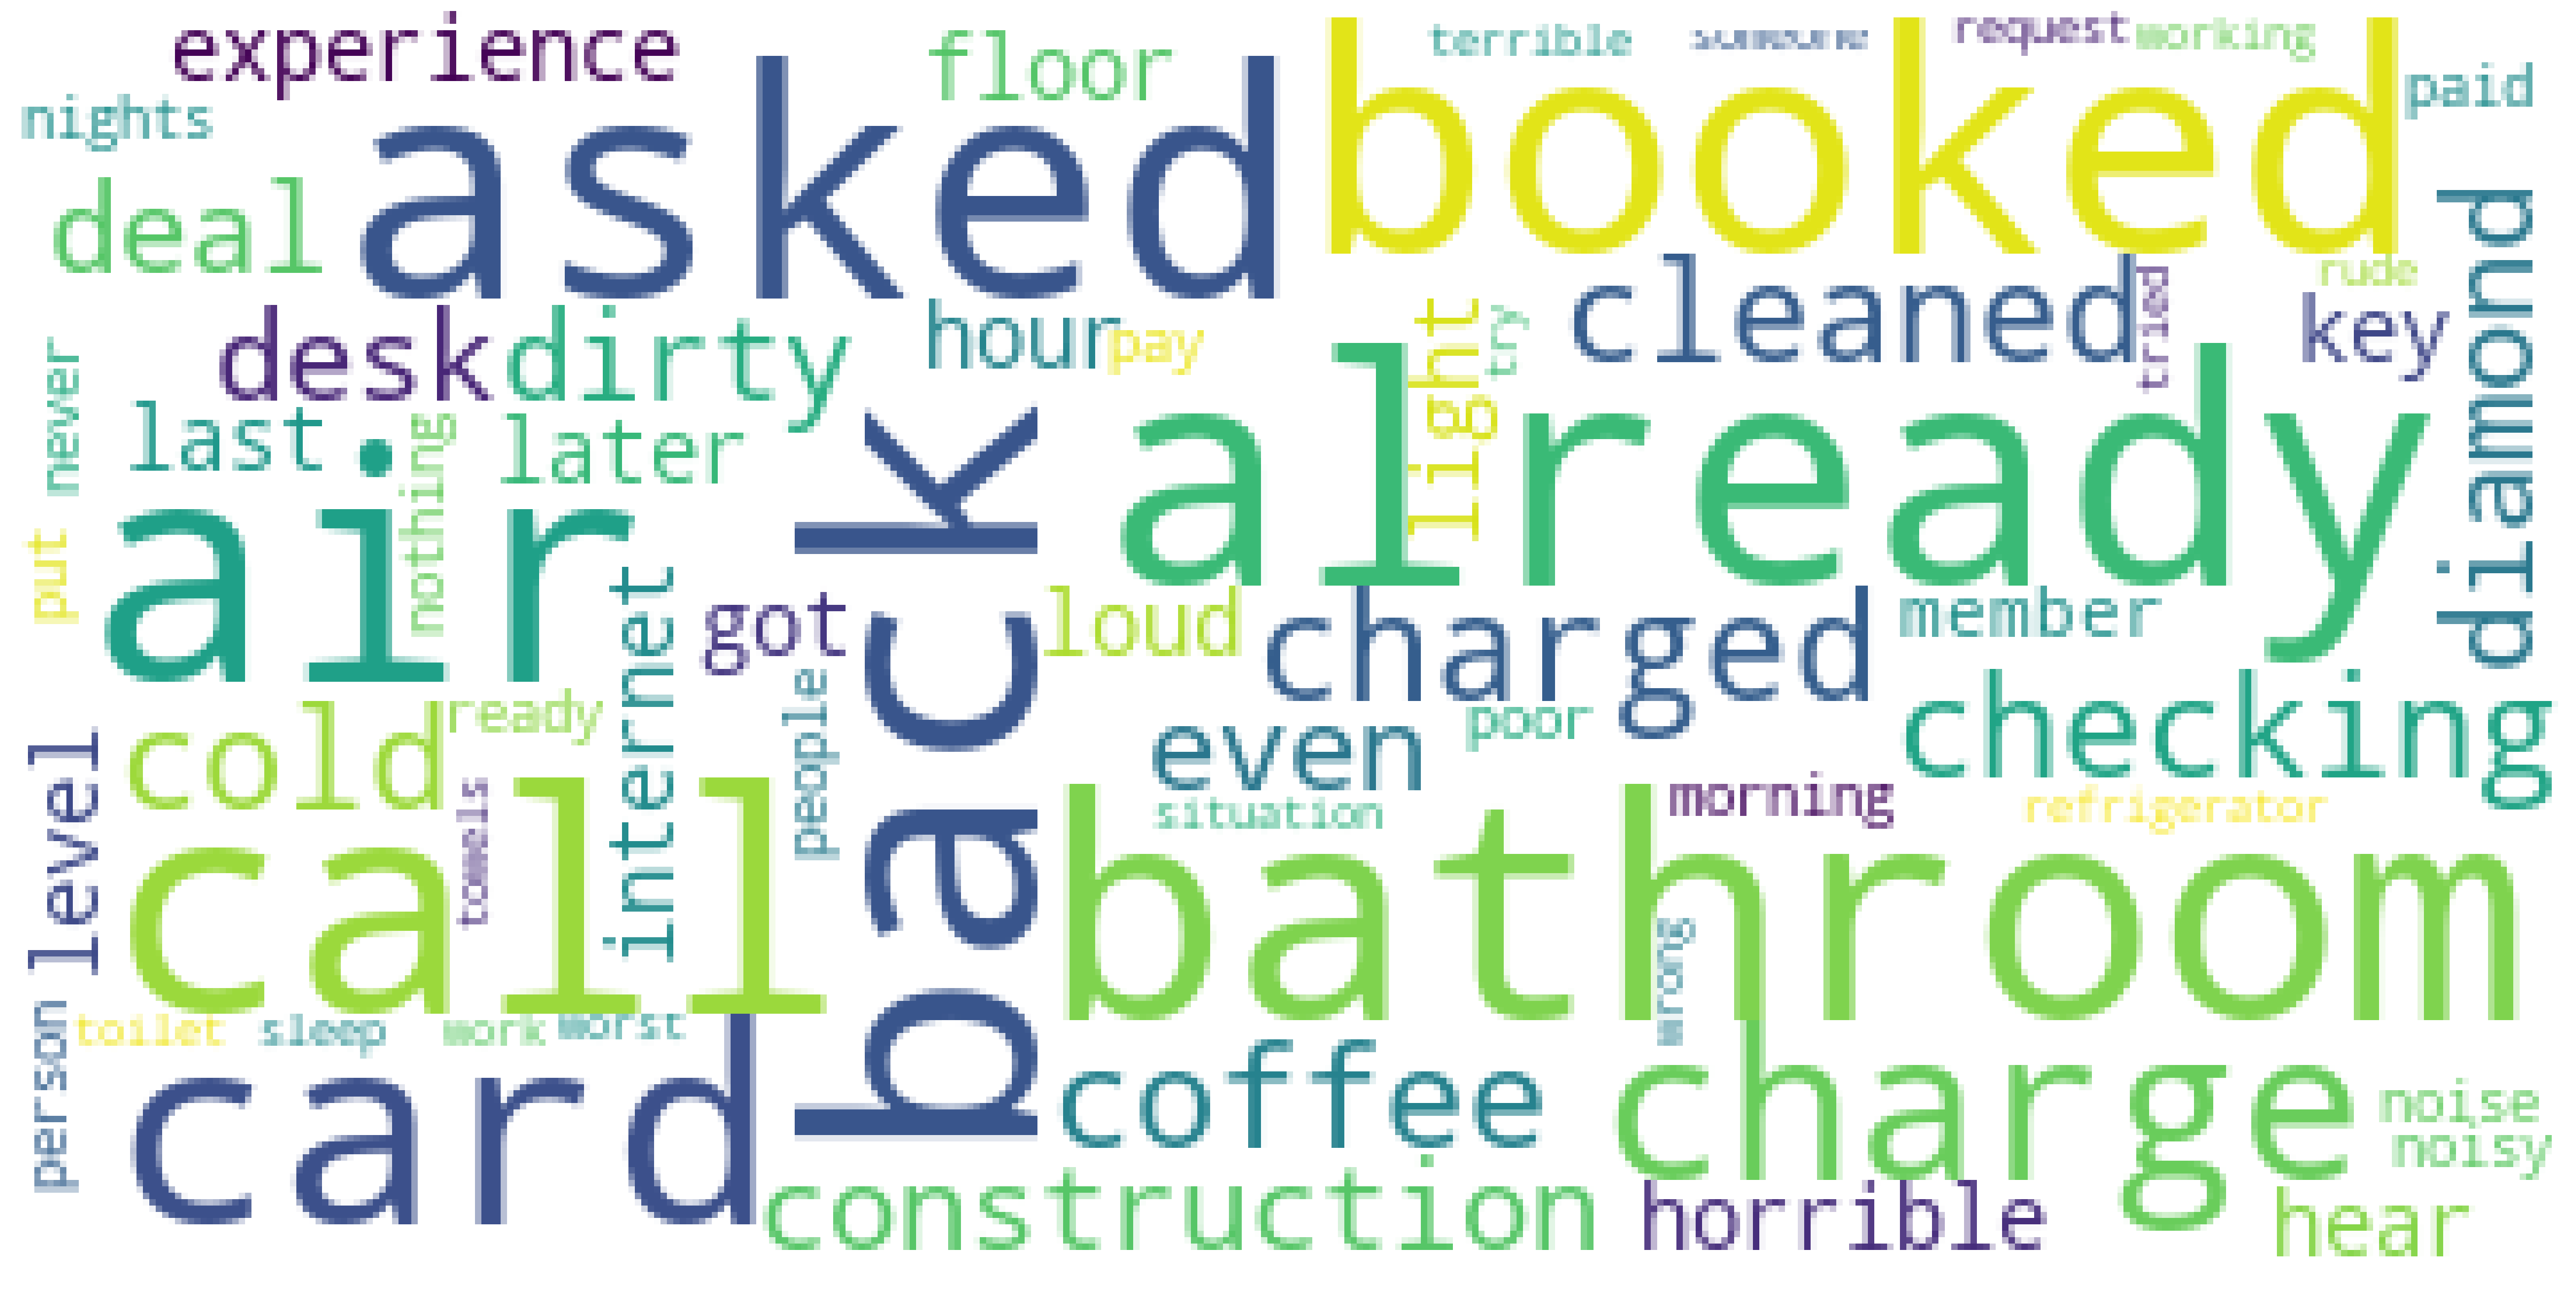

In [83]:
wc(more_neg_words,'white')

In [ ]:
#import pandas
#from sklearn import model_selection
#from sklearn.linear_model import LogisticRegression
#url = "DoubleTree Middle1.csv"
#names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
#dataframe = pandas.read_csv(url, names=names)
#seed = 7
#kfold = model_selection.KFold(n_splits=10, random_state=seed)
#model = LogisticRegression()
#scoring = 'roc_auc'
#results = model_selection.cross_val_score(model, X, target, cv=kfold, scoring=scoring)
#print("AUC: %.3f (%.3f)") % (results.mean(), results.std())